<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Avantika/Key_Components_of_Transformer_Models_Multi_head_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSelfAttention.forward`.
  return forward_call(*args, **kwargs)


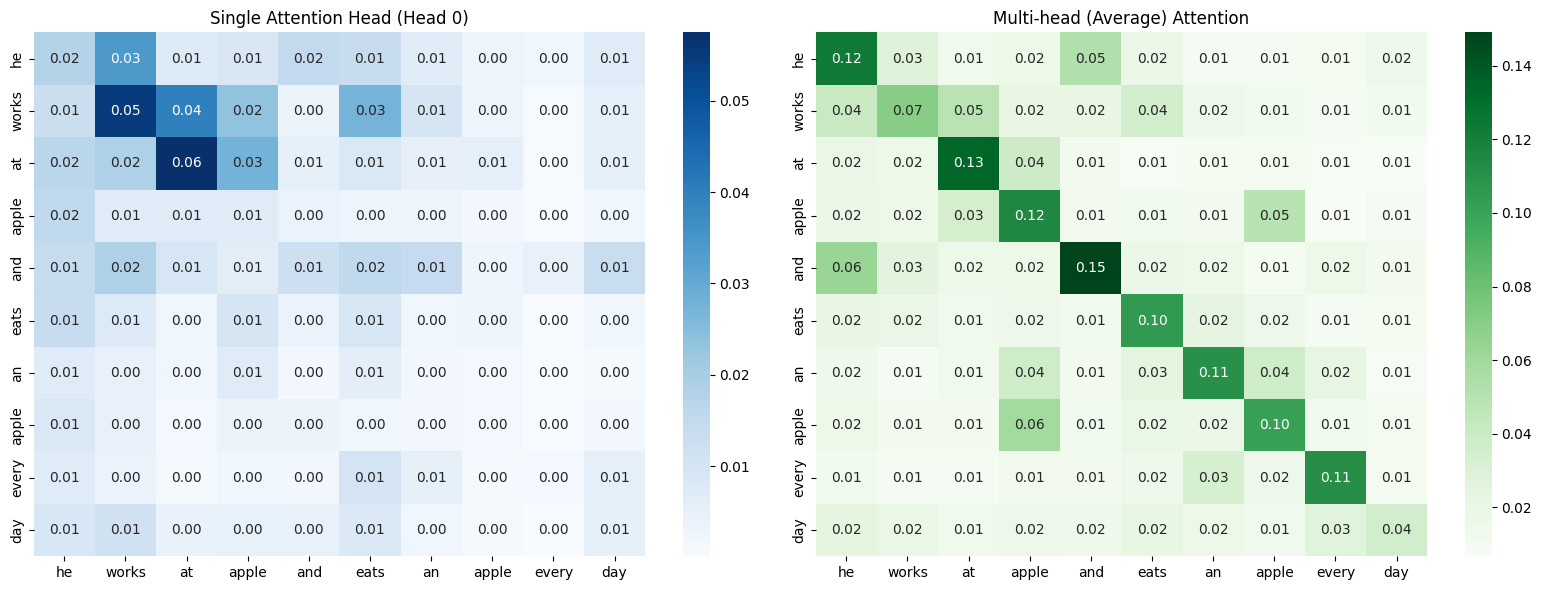

In [1]:
#Import libraries
from transformers import AutoTokenizer, AutoModel
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Load pre-trained model(This model has 12 attention heads) and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)

# Input sentence
sentence = "He works at Apple and eats an apple every day"
inputs = tokenizer(sentence, return_tensors="pt")

# Run the model and get attention scores
outputs = model(**inputs)
attentions = outputs.attentions

# Extract the last layer's attention
last_layer_attention = attentions[-1]  # Shape: [1, num_heads, seq_len, seq_len]
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
num_heads = last_layer_attention.shape[1]

# Convert attention and tokens to NumPy arrays
head_0 = last_layer_attention[0, 0].detach().numpy()
avg_attention = last_layer_attention[0].mean(dim=0).detach().numpy()

# Remove [CLS] and [SEP] tokens
tokens_cleaned = tokens[1:-1]
head_0_cleaned = head_0[1:-1, 1:-1]
avg_attention_cleaned = avg_attention[1:-1, 1:-1]

# Set up side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap for single head (Head 0)
sns.heatmap(head_0_cleaned, xticklabels=tokens_cleaned, yticklabels=tokens_cleaned, cmap="Blues", annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title("Single Attention Head (Head 0)")

# Heatmap for average attention
sns.heatmap(avg_attention_cleaned, xticklabels=tokens_cleaned, yticklabels=tokens_cleaned, cmap="Greens", annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title("Multi-head (Average) Attention")

plt.tight_layout()
plt.show()
